In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress

In [3]:
covid_county_csv = 'Resources/us_counties_covid19_daily.csv'

county_df = pd.read_csv(covid_county_csv)
county_df.head()

,date,county,state,fips,cases,deaths
0,1/21/2020,Snohomish,Washington,53061.0,1,0.0
1,1/22/2020,Snohomish,Washington,53061.0,1,0.0
2,1/23/2020,Snohomish,Washington,53061.0,1,0.0
3,1/24/2020,Cook,Illinois,17031.0,1,0.0
4,1/24/2020,Snohomish,Washington,53061.0,1,0.0


In [ ]:
#clean_county_df = county_df[['date', 'county]]

In [4]:
#county_df['county'].value_counts()

In [ ]:
#county_df['county'].unique()

In [ ]:
#county_df['state'].unique()

In [ ]:
#county_df['state'].count()

In [ ]:
#orleans_df = county_df.loc[county_df['county'] == 'Orleans Parish']
#hancock_df = county_df.loc[county_df['county'] == 'Hancock']

In [ ]:
#orleans_df.head()
#hancock_df

In [5]:
louisiana_df = county_df.loc[county_df['state'] == 'Louisiana']

In [6]:
louisiana_df

,date,county,state,fips,cases,deaths
923,3/9/2020,Jefferson,Louisiana,22051.0,1,0.0
1068,3/10/2020,Jefferson,Louisiana,22051.0,1,0.0
1069,3/10/2020,Orleans,Louisiana,22071.0,5,0.0
1246,3/11/2020,Caddo,Louisiana,22017.0,1,0.0
1247,3/11/2020,Jefferson,Louisiana,22051.0,1,0.0
...,...,...,...,...,...,...
798370,12/5/2020,Webster,Louisiana,22119.0,2138,59.0
798371,12/5/2020,West Baton Rouge,Louisiana,22121.0,1425,44.0
798372,12/5/2020,West Carroll,Louisiana,22123.0,718,21.0
798373,12/5/2020,West Feliciana,Louisiana,22125.0,820,25.0


In [8]:
orleans_df = louisiana_df.loc[louisiana_df['county'] == 'Orleans']
orleans_df

,date,county,state,fips,cases,deaths
1069,3/10/2020,Orleans,Louisiana,22071.0,5,0.0
1248,3/11/2020,Orleans,Louisiana,22071.0,11,0.0
1465,3/12/2020,Orleans,Louisiana,22071.0,12,0.0
1738,3/13/2020,Orleans,Louisiana,22071.0,28,0.0
2077,3/14/2020,Orleans,Louisiana,22071.0,53,1.0
...,...,...,...,...,...,...
785364,12/1/2020,Orleans,Louisiana,22071.0,16077,648.0
788608,12/2/2020,Orleans,Louisiana,22071.0,16421,649.0
791854,12/3/2020,Orleans,Louisiana,22071.0,16580,649.0
795100,12/4/2020,Orleans,Louisiana,22071.0,16733,649.0


In [19]:
orleans_clean_df = orleans_df[['date', 'county', 'cases', 'deaths']]
#orleans_clean_df
organized_orleans = orleans_clean_df[['date', 'county', 'cases', 'deaths']]
organized_orleans

,date,county,cases,deaths
1069,3/10/2020,Orleans,5,0.0
1248,3/11/2020,Orleans,11,0.0
1465,3/12/2020,Orleans,12,0.0
1738,3/13/2020,Orleans,28,0.0
2077,3/14/2020,Orleans,53,1.0
...,...,...,...,...
785364,12/1/2020,Orleans,16077,648.0
788608,12/2/2020,Orleans,16421,649.0
791854,12/3/2020,Orleans,16580,649.0
795100,12/4/2020,Orleans,16733,649.0


<IPython.core.display.Javascript object>


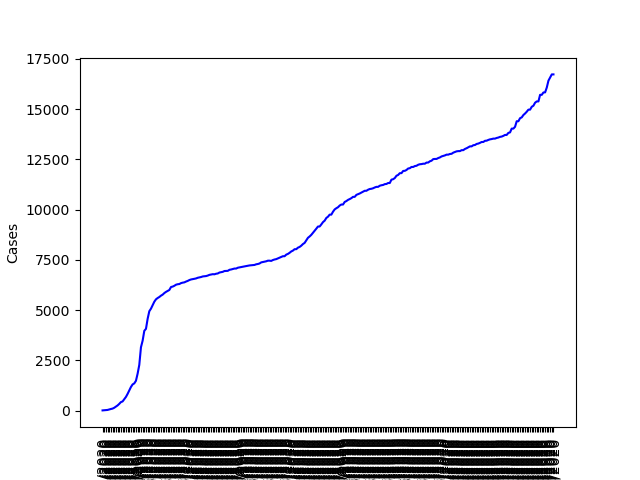

In [31]:
date = organized_orleans.iloc[:,0]
cases = organized_orleans.iloc[:,2]
#deaths = organized_orleans.iloc[:,3]
case_rate = plt.plot(date, cases, color='blue', label='Confirmed Cases')
#death_rate = plt.plot(date, deaths, color='red', label='Confirmed Deaths')
plt.xticks(date, rotation=90)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

In [20]:
georgia_df = county_df.loc[county_df['state'] == 'Georgia']
hancock_df = georgia_df.loc[georgia_df['county'] == 'Hancock']
#hancock_df
reduced_hancock = hancock_df[['date', 'county', 'cases', 'deaths']]
reduced_hancock

,date,county,cases,deaths
38499,4/7/2020,Hancock,1,0.0
41043,4/8/2020,Hancock,1,0.0
43617,4/9/2020,Hancock,1,0.0
46219,4/10/2020,Hancock,1,0.0
48849,4/11/2020,Hancock,3,0.0
...,...,...,...,...
784669,12/1/2020,Hancock,530,46.0
787913,12/2/2020,Hancock,533,46.0
791159,12/3/2020,Hancock,534,47.0
794405,12/4/2020,Hancock,536,47.0


In [21]:
arkansas_df = county_df.loc[county_df['state'] == 'Arkansas']
phillips_df = arkansas_df.loc[arkansas_df['county'] == 'Phillips']
#phillips_df
clean_phillips = phillips_df[['date', 'county', 'cases', 'deaths']]
clean_phillips

,date,county,cases,deaths
33288,4/5/2020,Phillips,1,0.0
35732,4/6/2020,Phillips,1,0.0
38221,4/7/2020,Phillips,1,0.0
40765,4/8/2020,Phillips,1,0.0
43337,4/9/2020,Phillips,2,0.0
...,...,...,...,...
784373,12/1/2020,Phillips,960,17.0
787617,12/2/2020,Phillips,968,17.0
790863,12/3/2020,Phillips,980,17.0
794109,12/4/2020,Phillips,995,17.0


In [11]:
michigan_df = county_df.loc[county_df['state'] == 'Michigan']
jefferson_df = michigan_df.loc[michigan_df['county'] == 'Jefferson']
jefferson_df

,date,county,state,fips,cases,deaths


In [23]:
alabama_df = county_df.loc[county_df['state'] == 'Alabama']
greene_df = alabama_df.loc[alabama_df['county'] == 'Greene']
#greene_df
clean_greene = greene_df[['date', 'county', 'cases', 'deaths']]
clean_greene

,date,county,cases,deaths
14048,3/27/2020,Greene,1,0.0
15826,3/28/2020,Greene,3,0.0
17709,3/29/2020,Greene,3,0.0
19680,3/30/2020,Greene,3,0.0
21752,3/31/2020,Greene,3,0.0
...,...,...,...,...
784241,12/1/2020,Greene,435,18.0
787485,12/2/2020,Greene,442,18.0
790731,12/3/2020,Greene,445,18.0
793977,12/4/2020,Greene,458,18.0


In [24]:
arizona_df = county_df.loc[county_df['state'] == 'Arizona']
santa_cruz_df = arizona_df.loc[arizona_df['county'] == 'Santa Cruz']
#santa_cruz_df
clean_sc = santa_cruz_df[['date', 'county', 'cases', 'deaths']]
clean_sc

,date,county,cases,deaths
4425,3/19/2020,Santa Cruz,1,0.0
5196,3/20/2020,Santa Cruz,1,0.0
6115,3/21/2020,Santa Cruz,1,0.0
7149,3/22/2020,Santa Cruz,1,0.0
8292,3/23/2020,Santa Cruz,1,0.0
...,...,...,...,...
784317,12/1/2020,Santa Cruz,4029,70.0
787561,12/2/2020,Santa Cruz,4067,72.0
790807,12/3/2020,Santa Cruz,4118,73.0
794053,12/4/2020,Santa Cruz,4255,75.0


In [26]:
california_df = county_df.loc[county_df['state'] == 'California']
imperial_df = california_df.loc[california_df['county'] == 'Imperial']
#imperial_df
clean_imperial = imperial_df[['date', 'county', 'cases', 'deaths']]
clean_imperial

,date,county,cases,deaths
5231,3/20/2020,Imperial,4,0.0
6152,3/21/2020,Imperial,4,0.0
7186,3/22/2020,Imperial,4,0.0
8329,3/23/2020,Imperial,4,0.0
9570,3/24/2020,Imperial,9,0.0
...,...,...,...,...
784408,12/1/2020,Imperial,16364,355.0
787652,12/2/2020,Imperial,16429,355.0
790898,12/3/2020,Imperial,16507,357.0
794144,12/4/2020,Imperial,16555,359.0


In [27]:
new_mexico_df = county_df.loc[county_df['state'] == 'New Mexico']
guadalupe_df = new_mexico_df.loc[new_mexico_df['county'] == 'Guadalupe']
#guadalupe_df
clean_guadalupe = guadalupe_df[['date', 'county', 'cases', 'deaths']]
clean_guadalupe

,date,county,cases,deaths
68949,4/18/2020,Guadalupe,1,0.0
71716,4/19/2020,Guadalupe,1,0.0
74491,4/20/2020,Guadalupe,1,0.0
77272,4/21/2020,Guadalupe,1,0.0
80061,4/22/2020,Guadalupe,2,0.0
...,...,...,...,...
786030,12/1/2020,Guadalupe,228,2.0
789276,12/2/2020,Guadalupe,232,2.0
792522,12/3/2020,Guadalupe,241,2.0
795767,12/4/2020,Guadalupe,257,2.0


In [28]:
mora_df = new_mexico_df.loc[new_mexico_df['county'] == 'Mora']
#mora_df
clean_mora = mora_df[['date', 'county', 'cases', 'deaths']]
clean_mora

,date,county,cases,deaths
320537,7/10/2020,Mora,1,0.0
323718,7/11/2020,Mora,2,0.0
326903,7/12/2020,Mora,3,0.0
330091,7/13/2020,Mora,3,0.0
333282,7/14/2020,Mora,2,0.0
...,...,...,...,...
786038,12/1/2020,Mora,36,0.0
789284,12/2/2020,Mora,38,0.0
792530,12/3/2020,Mora,41,0.0
795775,12/4/2020,Mora,42,0.0


In [29]:
texas_df = county_df.loc[county_df['state'] == 'Texas']
zavala_df = texas_df.loc[texas_df['county'] == 'Zavala']
#zavala_df
clean_zavala = zavala_df[['date', 'county', 'cases', 'deaths']]
clean_zavala

,date,county,cases,deaths
67022,4/17/2020,Zavala,1,0.0
69783,4/18/2020,Zavala,1,0.0
72553,4/19/2020,Zavala,1,0.0
75329,4/20/2020,Zavala,1,0.0
78111,4/21/2020,Zavala,1,0.0
...,...,...,...,...
787082,12/1/2020,Zavala,737,22.0
790328,12/2/2020,Zavala,737,22.0
793574,12/3/2020,Zavala,816,24.0
796819,12/4/2020,Zavala,816,24.0
